# Imports and setting up viz

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

/home/ptiengou/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ptiengou/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

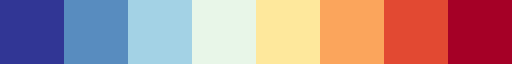

In [3]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

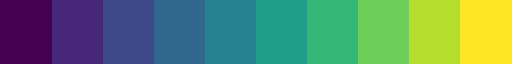

In [4]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

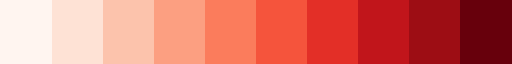

In [5]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

# Load files

Looking at simulations over 30 years (1979-2008) to better understand the stabilisation dynamics of the routing (espacially native with MERIT grid)

## Standard (nat7)

In [6]:
#open nat7/nat7_sechiba_history_all.nc as std
filename = 'nat7/nat7_sechiba_history_all.nc'
std = xr.open_dataset(filename)
std

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 360, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] ...
  * time_counter            (time_counter) datetime64[ns] 1979-01-16T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/74)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] ...
    Areas                   (lat, lon) float32 ...
    Contfrac                (lat, lon) float32 ...
    evap                    (time_counter, lat, lon) float32 ...
    coastalflow             (time_counter, lat, lon) float32 ...
    ...                      ...
    snowtemp_weighted       (time_counter, lat, lon) float32 ...
    frac_snow               (time_counter, lat, lon) float32 ...
    Qg                      (time_counter, lat, lon) float32 ...
    root_deficit            (time_counter, lat, lon) float32 ...
    root_mc_fc              (time_counter, lat, lon) float32 ...
    aei_sw                  (time_counter, lat, lon) float32 ...
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 08:59:32 GMT
    uuid:         940f6152-4881-4fff-bfc6-162b86280b43
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...
    history:      Thu Feb  8 10:57:34 2024: ncrcat nat7_19790101_19791231_1M_...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

## Native routing topo 0.5° (nat8)

In [7]:
#open nat8/nat8_sechiba_history_all.nc as natORC_half
filename = 'nat8/nat8_sechiba_history_all.nc'
natORC_half = xr.open_dataset(filename)
natORC_half

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 360, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] ...
  * time_counter            (time_counter) datetime64[ns] 1979-01-16T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/71)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] ...
    Areas                   (lat, lon) float32 ...
    Contfrac                (lat, lon) float32 ...
    evap                    (time_counter, lat, lon) float32 ...
    coastalflow             (time_counter, lat, lon) float32 ...
    ...                      ...
    snowtemp_weighted       (time_counter, lat, lon) float32 ...
    frac_snow               (time_counter, lat, lon) float32 ...
    Qg                      (time_counter, lat, lon) float32 ...
    root_deficit            (time_counter, lat, lon) float32 ...
    root_mc_fc              (time_counter, lat, lon) float32 ...
    aei_sw                  (time_counter, lat, lon) float32 ...
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 09:04:47 GMT
    uuid:         a2751c8c-1325-49cb-8b1c-f43a9408b50d
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...
    history:      Thu Feb  8 11:06:44 2024: ncrcat nat8_19790101_19791231_1M_...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [8]:
#open nat8/diag_routing_monthly_all.nc as natDIAG_half
filename = 'nat8/nat8_diag_routing_monthly_all.nc'
natDIAG_half = xr.open_dataset(filename)
natDIAG_half

<xarray.Dataset>
Dimensions:                   (time_counter: 360, bnds: 2,
                               lon_domain_landpoints: 38,
                               lat_domain_landpoints: 36,
                               lon_routing_domain: 42, lat_routing_domain: 40)
Coordinates:
  * time_counter              (time_counter) datetime64[ns] 1979-01-16T12:00:...
  * lon_domain_landpoints     (lon_domain_landpoints) float32 -14.75 ... 3.75
  * lat_domain_landpoints     (lat_domain_landpoints) float32 27.25 ... 44.75
  * lon_routing_domain        (lon_routing_domain) float32 -15.75 ... 4.75
  * lat_routing_domain        (lat_routing_domain) float32 45.75 45.25 ... 26.25
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds         (time_counter, bnds) datetime64[ns] ...
    routing_runoff            (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_drainage          (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_coastalflow       (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_riverflow         (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_lakeinflow        (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_fast_reservoir    (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_slow_reservoir    (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_stream_reservoir  (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_irrigation        (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
    routing_basins_area       (lat_routing_domain, lon_routing_domain) float32 ...
    routing_stream_diag       (time_counter, lat_domain_landpoints, lon_domain_landpoints) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Feb 08 11:12:35 2024: cdo -b F32 -monavg nat8_diag_rout...
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Feb-08 09:04:49 GMT
    uuid:         1a470a35-ed38-4c20-92c3-685209280703
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [9]:
#open nat8/nat8_diag_routing_r_all.nc as natDIAG__R_half
filename = 'nat8/nat8_diag_routing_r_all.nc'
natDIAG_R_half = xr.open_dataset(filename)
natDIAG_R_half

<xarray.Dataset>
Dimensions:                     (lat: 40, lon: 42, basins: 200,
                                 time_counter: 360, axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.75 45.25 44.75 ... 26.75 26.25
  * lon                         (lon) float32 -15.75 -15.25 -14.75 ... 4.25 4.75
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 1979-01-16T12:0...
    time_centered               (time_counter) datetime64[ns] ...
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    flow_r                      (time_counter, lat, lon) float64 ...
    routing_runoff_r            (time_counter, lat, lon) float64 ...
    routing_lakeinflow_r        (time_counter, lat, lon) float64 ...
    ...                          ...
    routing_hydrographs_r       (time_counter, lat, lon) float64 ...
    irrig_netereq_r             (time_counter, lat, lon) float64 ...
    routing_irrigation_r        (time_counter, lat, lon) float64 ...
    basins_riverflow            (time_counter, basins) float64 ...
    routing_basins_area         (lat, lon) float64 ...
    routing_stream_diag_r       (time_counter, lat, lon) float64 ...
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 09:04:49 GMT
    uuid:         65c0743c-487d-4e62-8b05-dae81d16a272
    history:      Thu Feb  8 11:07:43 2024: ncrcat nat8_19790101_19791231_1D_...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

## Native routing topo MERIT (nat10)

In [10]:
#open sechiba_history_all.nc as natORC
filename = 'nat10/dt3600/nat10_dt3600_sechiba_history_all.nc'
natORC = xr.open_dataset(filename)
natORC

<xarray.Dataset>
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1,
                             time_counter: 240, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
    time_centered           (time_counter) datetime64[ns] ...
  * time_counter            (time_counter) datetime64[ns] 1979-01-16T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/71)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] ...
    Areas                   (lat, lon) float32 ...
    Contfrac                (lat, lon) float32 ...
    evap                    (time_counter, lat, lon) float32 ...
    coastalflow             (time_counter, lat, lon) float32 ...
    ...                      ...
    snowtemp_weighted       (time_counter, lat, lon) float32 ...
    frac_snow               (time_counter, lat, lon) float32 ...
    Qg                      (time_counter, lat, lon) float32 ...
    root_deficit            (time_counter, lat, lon) float32 ...
    root_mc_fc              (time_counter, lat, lon) float32 ...
    aei_sw                  (time_counter, lat, lon) float32 ...
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 15:19:43 GMT
    uuid:         857f869e-7b3a-4949-8c4a-a19dfe29b165
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...
    history:      Fri Feb  9 09:53:19 2024: ncrcat nat10_19790101_19791231_1M...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [11]:
#open diag_routing_all.nc
filename = 'nat10/dt3600/nat10_dt3600_diag_routing_all.nc'
natDIAG = xr.open_dataset(filename)
natDIAG

<xarray.Dataset>
Dimensions:                        (lat_domain_landpoints: 36,
                                    lon_domain_landpoints: 38,
                                    lat_domain_landpoints_routing: 36,
                                    lon_domain_landpoints_routing: 38,
                                    lat_routing_domain: 1200,
                                    lon_routing_domain: 1260,
                                    time_counter: 240, axis_nbounds: 2)
Coordinates:
  * lat_domain_landpoints          (lat_domain_landpoints) float32 27.25 ... ...
  * lon_domain_landpoints          (lon_domain_landpoints) float32 -14.75 ......
  * lat_domain_landpoints_routing  (lat_domain_landpoints_routing) float32 27...
  * lon_domain_landpoints_routing  (lon_domain_landpoints_routing) float32 -1...
  * lat_routing_domain             (lat_routing_domain) float32 45.99 ... 26.01
  * lon_routing_domain             (lon_routing_domain) float32 -15.99 ... 4.992
    time_instant                   (time_counter) datetime64[ns] ...
  * time_counter                   (time_counter) datetime64[ns] 1979-01-16T1...
    time_centered                  (time_counter) datetime64[ns] ...
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds            (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds            (time_counter, axis_nbounds) datetime64[ns] ...
    time_centered_bounds           (time_counter, axis_nbounds) datetime64[ns] ...
    routing_runoff                 (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 ...
    routing_drainage               (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 ...
    routing_coastalflow            (time_counter, lat_domain_landpoints, lon_domain_landpoints) float64 ...
    ...                             ...
    routing_fast_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 ...
    routing_slow_reservoir         (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 ...
    routing_stream_reservoir       (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 ...
    routing_irrigation             (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 ...
    routing_basins_area            (lat_routing_domain, lon_routing_domain) float64 ...
    routing_stream_diag            (time_counter, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 ...
Attributes:
    name:         diag_routing
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 15:20:09 GMT
    uuid:         61b4fb75-d44e-468a-9cfb-002be59c60ff
    history:      Fri Feb  9 09:53:34 2024: ncrcat nat10_19790101_19791231_1D...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [12]:
#open file with hydrographs on 30 years sim
filename = 'nat10/dt3600/nat10_dt3600_diag_routing_r_all.nc'
natDIAG_R = xr.open_dataset(filename)
natDIAG_R

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200,
                                 time_counter: 240, axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 1979-01-16T12:0...
    time_centered               (time_counter) datetime64[ns] ...
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    flow_r                      (time_counter, lat, lon) float64 ...
    routing_runoff_r            (time_counter, lat, lon) float64 ...
    routing_lakeinflow_r        (time_counter, lat, lon) float64 ...
    ...                          ...
    routing_hydrographs_r       (time_counter, lat, lon) float64 ...
    irrig_netereq_r             (time_counter, lat, lon) float64 ...
    routing_irrigation_r        (time_counter, lat, lon) float64 ...
    basins_riverflow            (time_counter, basins) float64 ...
    routing_basins_area         (lat, lon) float64 ...
    routing_stream_diag_r       (time_counter, lat, lon) float64 ...
Attributes:
    name:         diag_routing_r
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-08 15:20:09 GMT
    uuid:         d00f8ea2-ab81-4063-a90f-4338d717e76c
    history:      Fri Feb  9 09:54:19 2024: ncrcat nat10_19790101_19791231_1D...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

# File manipulations

In [13]:
#Change dataset names attribute for automatic labeling
natORC.attrs['name'] = 'sechiba_history_native'
natORC_half.attrs['name'] = 'sechiba_history_native_half'
natDIAG_half.attrs['name'] = 'diag_routing_monthly_native_half'
natDIAG_R_half.attrs['name'] = 'diag_routing_r_native_half'

In [14]:
#rename time_counter to time in all datasets
std = std.rename({'time_counter' : 'time'})
natORC_half = natORC_half.rename({'time_counter' : 'time'})
natDIAG_half = natDIAG_half.rename({'time_counter' : 'time'})
natDIAG_R_half = natDIAG_R_half.rename({'time_counter' : 'time'})
natDIAG = natDIAG.rename({'time_counter' : 'time'})
natDIAG_R = natDIAG_R.rename({'time_counter' : 'time'})
natORC = natORC.rename({'time_counter' : 'time'})

In [15]:
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_hydrographs_r' : 'hydrographs'}
#change the variables according to the dictionary
natDIAG_R = natDIAG_R.rename(dict)
natDIAG_R_half = natDIAG_R_half.rename(dict)

In [16]:
#Rename lat_domain_landpoints to lat and lon_domain_landpoints to lon in natDIAG
# natDIAG = natDIAG.rename({'lat_domain_landpoints':'lat','lon_domain_landpoints':'lon'})

#OR do it for lat_domain_landpoints_routing and lon_domain_landpoints_routing (for reservoirs)

# natDIAG = natDIAG.rename({'lat_domain_landpoints_routing':'lat','lon_domain_landpoints_routing':'lon'})
# natDIAG_half = natDIAG_half.rename({'lat_domain_landpoints_routing':'lat','lon_domain_landpoints_routing':'lon'})

In [17]:
#Rename variables in natDIAG_month
dict = {'routing_stream_reservoir' : 'streamr',
        'routing_fast_reservoir' : 'fastr',
        'routing_slow_reservoir' : 'slowr',
        'routing_drainage' : 'drainage',
        'routing_runoff' : 'runoff',
        'routing_riverflow' : 'riverflow',
        'routing_coastalflow' : 'coastalflow'}
#change the variables that exist according to the dictionary
natDIAG = natDIAG.rename(dict)
natDIAG_half = natDIAG_half.rename(dict)

# Maps

Text(0.5, 1.0, 'fastr (sechiba_history_native)')

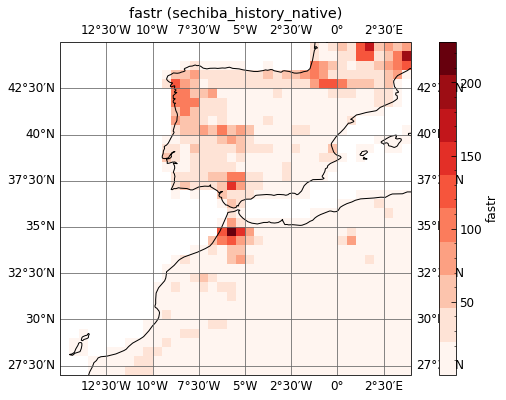

In [22]:
#Display map of var for ds
var='fastr'
ds = natORC
plotvar = ds[var].mean(dim='time')
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap with 20 bins from min to max value
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
plt.title(var + ' (' + ds.name + ')')

Text(0.5, 1.0, 'streamr (sechiba_history_native)')

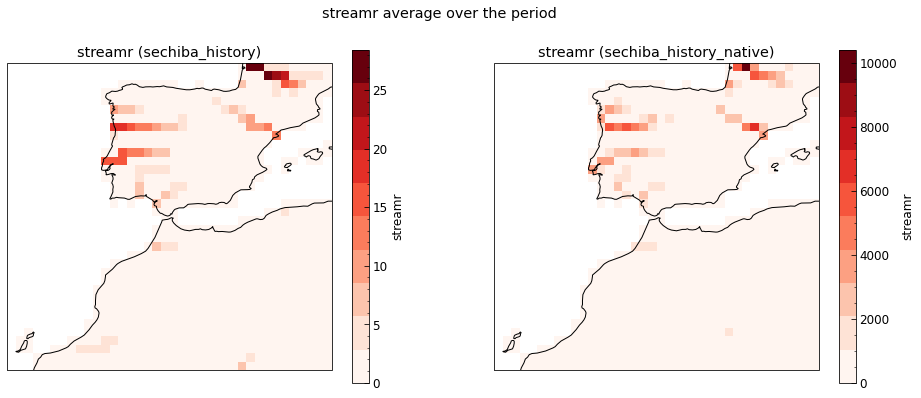

In [28]:
# Display map of var
var = 'streamr'

ds_std = std
plotvar_std = ds_std[var].mean(dim='time')

ds_nat = natORC
plotvar_nat = ds_nat[var].mean(dim='time')

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle(var + ' average over the period')

# Plot for std dataset
axs[0].coastlines()
plotvar_std.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap=reds)
axs[0].set_title(f'{var} ({ds_std.name})')

# Plot for natORC dataset
axs[1].coastlines()
plotvar_nat.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap=reds)
axs[1].set_title(f'{var} ({ds_nat.name})')

# Time series

In [29]:
river_coordinates = {
    'Ebre': {'lon': 0.75, 'lat': 40.75},
    'Minho': {'lon': -8.75, 'lat': 42.25},
    'Douro': {'lon': -8.75, 'lat': 41.25},
    'Tage': {'lon': -9.25, 'lat': 39.25},
    'Guadiana': {'lon': -7.25, 'lat': 38.25},
    'Guadalquivir': {'lon': -6.25, 'lat': 36.75}
}

In [30]:
river_coordinates_native = {
    'Ebre': {'lon': 0.86, 'lat': 40.725},
    'Minho': {'lon': -8.875, 'lat': 41.86},
    'Douro': {'lon': -8.675, 'lat': 41.1375},
    'Tage': {'lon': -9.175, 'lat': 38.6875},
    'Guadiana': {'lon': -7.39, 'lat': 37.175},
    'Guadalquivir': {'lon': -6.34, 'lat': 36.79}
}

In [ ]:
#Time series on a specific lon-lat point
year_min=1979
year_max=2008

# lon=-6.34
# lat=36.79
lon=-8.75
lat=39.25

var="streamr"
ds1=natORC
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natORC_half
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
ds3=std
ds3 = ds3.where(ds3['time.year'] >= year_min, drop=True).where(ds3['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
ds3[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds3.name)
ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
plt.title(var + ' at (' + str(lon) + ',' + str(lat) + ')')
plt.legend()

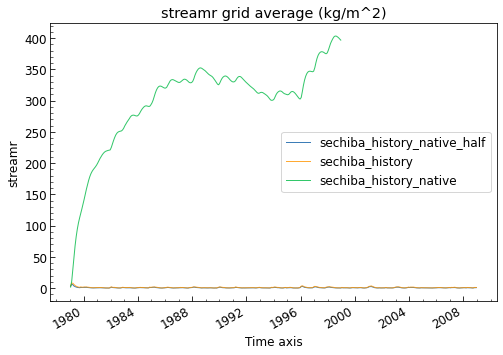

In [34]:
#Time series on grid average
year_min=1979
year_max=2008
var="streamr"
ds1= natORC
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natORC_half
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
ds3=std
ds3 = ds3.where(ds3['time.year'] >= year_min, drop=True).where(ds3['time.year'] <= year_max, drop=True)
#plot the time series of var
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.grid()
ds2[var].mean(dim=('lat','lon')).plot(ax=ax, label=ds2.name)
ds3[var].mean(dim=('lat','lon')).plot(ax=ax, label=ds3.name)
ds1[var].mean(dim=('lat','lon')).plot(ax=ax, label=ds1.name)
plt.title(var + ' grid average (' + std[var].units + ')')
plt.legend()

In [36]:
#cycle saisonnier pour 6 points de grille
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R_half
ds3 = natDIAG_R
spinup_last_year=1994
#remove years before spinup for all datasets
ds1 = ds1.where(ds1['time.year'] >= spinup_last_year, drop=True)
ds2 = ds2.where(ds2['time.year'] >= spinup_last_year, drop=True)
ds3 = ds3.where(ds3['time.year'] >= spinup_last_year, drop=True)

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    # ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
    # ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)

for i, (river, coordinates) in enumerate(river_coordinates_native.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds3[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds3.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Cycle saisonnier du débit à l'exutoire (m³/s, à partir de {})".format(spinup_last_year))
plt.tight_layout()

: 

In [ ]:
#série temporelle pour 6 points de grille
var = "hydrographs"
ds1 = std
ds2 = natDIAG_R_half
ds3 = natDIAG_R

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)

for i, (river, coordinates) in enumerate(river_coordinates_native.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds3[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds3.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Série temporelle du débit à l'exutoire (m³/s)")
plt.tight_layout()